In [ ]:
'''
Esse script foi desenevolvido para uma análise pluviométrica do rio gramamme com a estação 14 

desenvolvido por : Daniel Nascimento, Iago Nogueira e Wesley Melo 

'''


In [1]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
import glob
print(os.listdir('/content/drive/My Drive/datasets'))

Mounted at /content/drive
['180801145837 Estacao id 112.dat', '190206100334 Estacao id 112.dat', '737018_Chuvas.csv', 'test.csv', 'est. pluv. 14 (Fev.06.2019).csv', 'est. pluv. 14 (Jul.17.2019).csv', 'est. pluv. 14 (Out.04.2019).csv', 'est. pluv.14 (Mar.04.2020).csv', 'python', 'Imagens']


In [3]:
# --- 1. Leitura e Pré-processamento dos Dados ---

caminho_arquivos = '/content/drive/My Drive/datasets/est. pluv. 14 *.csv'

lista_arquivos = glob.glob(caminho_arquivos)


if not lista_arquivos:
    print("Nenhum arquivo encontrado. Verifique o caminho e o nome da pasta.")
else:
    print(f"Arquivos encontrados: {lista_arquivos}")

    lista_dfs = []

    for arquivo in lista_arquivos:
        df_temp = pd.read_csv(arquivo, skiprows=5, header=None, sep=',')
        lista_dfs.append(df_temp)

    df = pd.concat(lista_dfs, ignore_index=True)

    df.columns = ['id', 'date_str', 'rain_str']

    df['date_time'] = pd.to_datetime(df['date_str'])

    # Separar a coluna 'rain_str' para extrair os pulsos
    df['rain_mm'] = df['rain_str'].str.split(' ', expand=True)[0]

    df = df.drop(columns=['id', 'date_str', 'rain_str'])

    # Transformar a coluna de pulsos ('rain_mm') de string para numérico
    df['rain_mm'] = pd.to_numeric(df['rain_mm'])

    # Determinar a precipitação multiplicando os pulsos pela resolução
    resolucao = 0.204  # Resolução em mm/tip
    df['rain_mm'] = df['rain_mm'] * resolucao

    df = df.drop_duplicates()

    # Excluir os dados de anos que não são 2019
    df = df[df['date_time'].dt.year == 2019]

    # Atribuir a coluna 'date_time' como index
    df = df.set_index('date_time')

    # Ordenar pelo index para garantir a sequência cronológica correta
    df = df.sort_index()

    print("\nDataFrame processado com sucesso:")
    print(df.head())

    caminho_saida = 'dados_processados_est14_2019.csv'
    df.to_csv(caminho_saida)
    print(f"\nDataFrame processado foi salvo em: {caminho_saida}")

Arquivos encontrados: ['/content/drive/My Drive/datasets/est. pluv. 14 (Fev.06.2019).csv', '/content/drive/My Drive/datasets/est. pluv. 14 (Jul.17.2019).csv', '/content/drive/My Drive/datasets/est. pluv. 14 (Out.04.2019).csv']

DataFrame processado com sucesso:
                     rain_mm
date_time                   
2019-01-01 00:00:00      0.0
2019-01-01 00:05:00      0.0
2019-01-01 00:10:00      0.0
2019-01-01 00:15:00      0.0
2019-01-01 00:20:00      0.0

DataFrame processado foi salvo em: dados_processados_est14_2019.csv


In [6]:
# Agregar dados para os passos de tempo horário, diário e mensal usando resample
df_sub_horario = df
df_horario = df.resample('h').sum()
df_diario = df.resample('D').sum()
df_mensal = df.resample('ME').sum()

"\ndf_sub_horario['rain_mm'].plot(kind='box',\n                 title='Distribuição do Nível',\n                 ylabel='Nível (m)'\n)\n\n# Histograma\n\ndf_sub_horario['rain_mm'].plot(\n    kind='hist',\n    bins=20,\n    color='skyblue',\n    edgecolor='black',\n    alpha=0.7,\n    grid=True,\n    figsize=(10,5),\n    title='Distribuição do Nível',\n    xlabel='Nível (m)',\n    ylabel='Frequência'\n)\n"

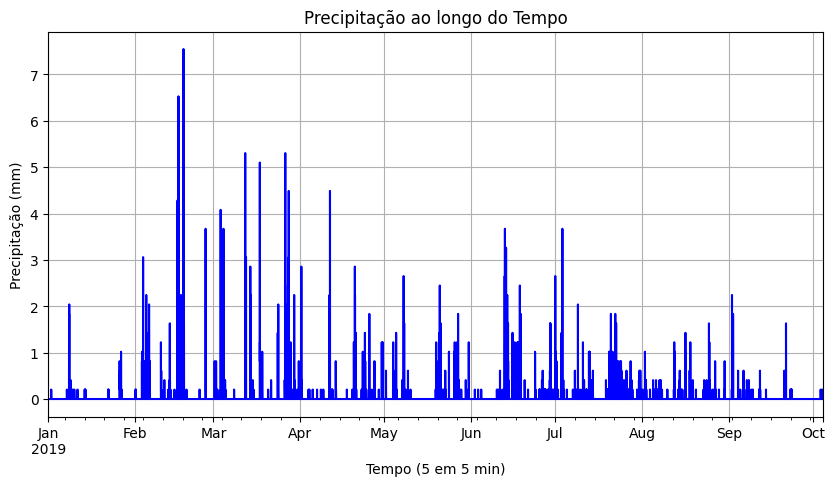

In [8]:
# Dados Sub horários

# Gráfico de linha

df_sub_horario['rain_mm'].plot(
    kind='line',
    title='Precipitação ao longo do Tempo',
    xlabel='Tempo (5 em 5 min)',
    ylabel='Precipitação (mm)',
    figsize=(10,5),
    color='blue',
    grid=True
    )

<Axes: title={'center': 'Precipitação (5 em 5 min)'}, ylabel='Precipitação (mm)'>

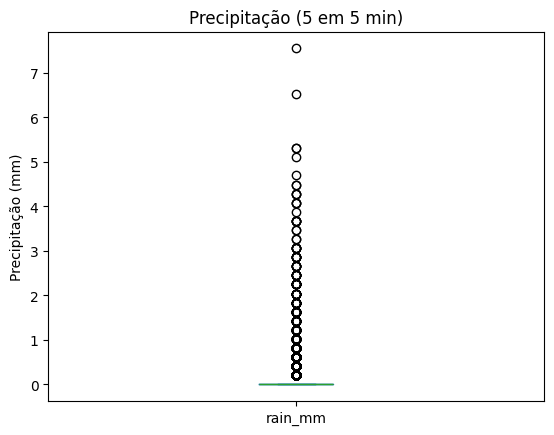

In [12]:
# Boxplot

df_sub_horario['rain_mm'].plot(kind='box',
                 title='Precipitação (5 em 5 min)',
                 ylabel='Precipitação (mm)'
)

<Axes: title={'center': ' Precipitação ao longo do tempo ( 5 em 5 min)'}, xlabel=' Precipitação(m)', ylabel='Frequência'>

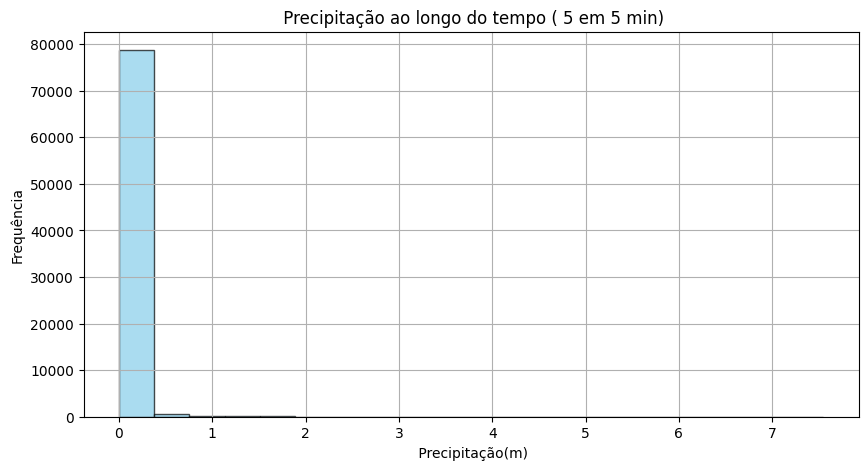

In [13]:
# Boxplot

df_sub_horario['rain_mm'].plot(kind='box',
                 title='Precipitação (5 em 5 min)',
                 ylabel='Precipitação (mm)'
)
# Histograma

df_sub_horario['rain_mm'].plot(
    kind='hist',
    bins=20,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    grid=True,
    figsize=(10,5),
    title=' Precipitação ao longo do tempo ( 5 em 5 min)',
    xlabel=' Precipitação(m)',
    ylabel='Frequência'
)

<Axes: title={'center': 'Precipitação ao longo do Tempo'}, xlabel='Tempo (horário)', ylabel='Precipitação (mm)'>

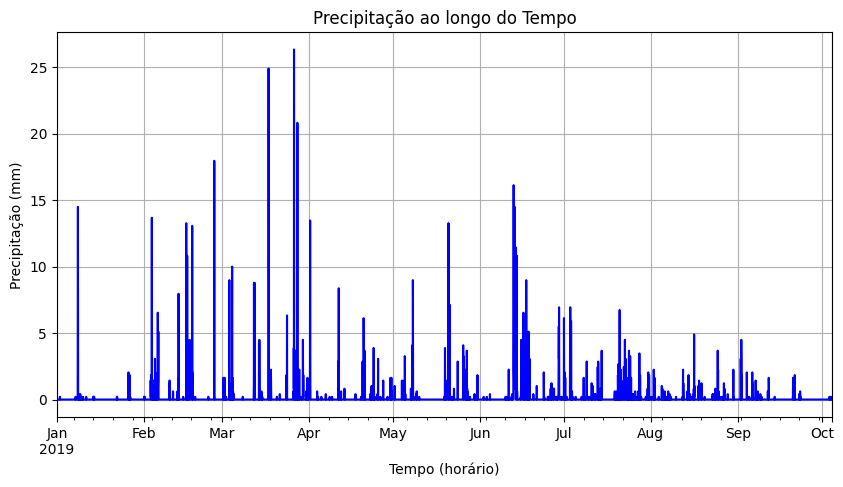

In [18]:
# Dados Horários

# Gráfico de linha

df_horario['rain_mm'].plot(
    kind='line',
    title='Precipitação ao longo do Tempo',
    xlabel='Tempo (horário)',
    ylabel='Precipitação (mm)',
    figsize=(10,5),
    color='blue',
    grid=True
    )


<Axes: title={'center': 'Precipitação (horária)'}, ylabel='Precipitação (mm)'>

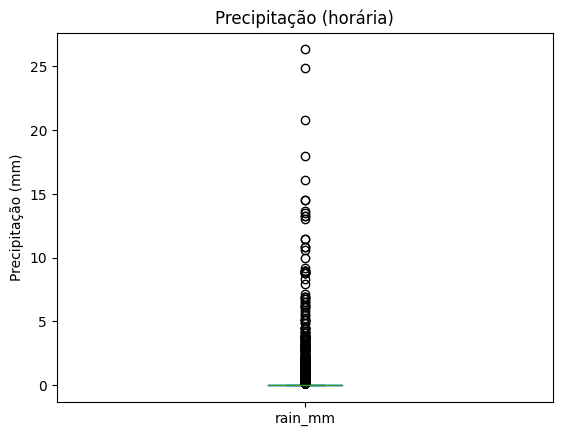

In [19]:
# Boxplot

df_horario['rain_mm'].plot(kind='box',
                 title='Precipitação (horária)',
                 ylabel='Precipitação (mm)'
)

<Axes: title={'center': ' Precipitação ao longo do tempo (horária)'}, xlabel=' Precipitação(m)', ylabel='Frequência'>

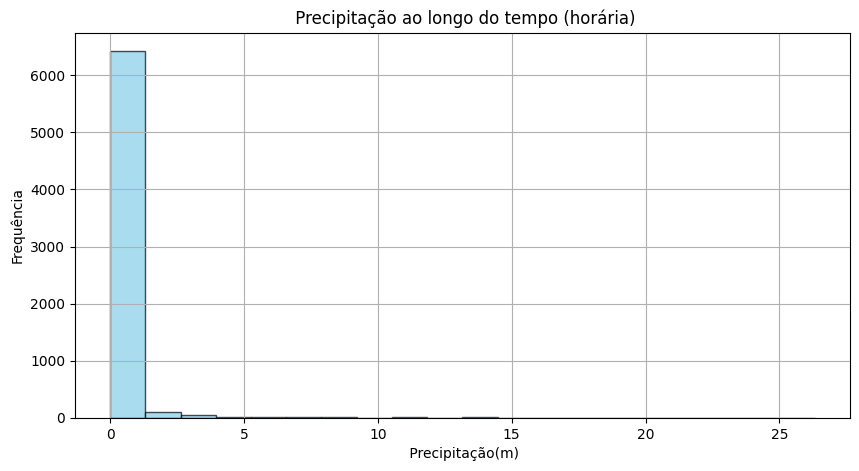

In [20]:
# Histograma

df_horario['rain_mm'].plot(
    kind='hist',
    bins=20,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    grid=True,
    figsize=(10,5),
    title=' Precipitação ao longo do tempo (horária)',
    xlabel=' Precipitação(m)',
    ylabel='Frequência'
)

<Axes: title={'center': 'Precipitação ao longo do Tempo'}, xlabel='Tempo (diário)', ylabel='Precipitação (mm)'>

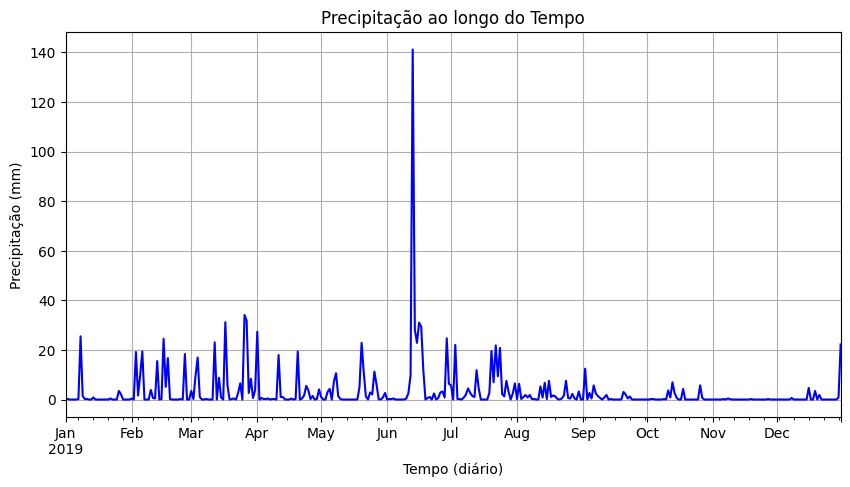

In [ ]:
# Dados Diários

# Gráfico de linha

df_total_diario['rain_mm'].plot(
    kind='line',
    title='Precipitação ao longo do Tempo',
    xlabel='Tempo (diário)',
    ylabel='Precipitação (mm)',
    figsize=(10,5),
    color='blue',
    grid=True
    )

<Axes: title={'center': 'Precipitação (diária)'}, ylabel='Precipitação (mm)'>

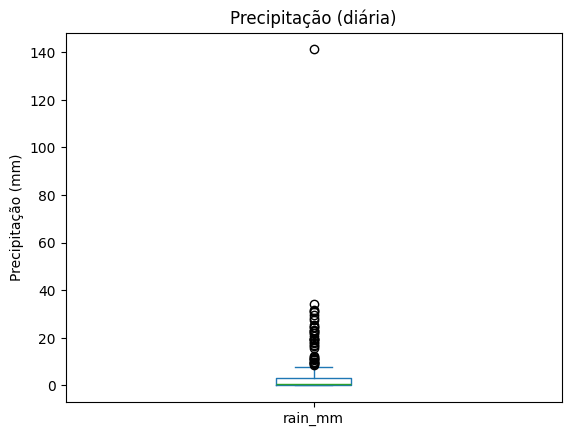

In [24]:
# Boxplot

df_diario['rain_mm'].plot(kind='box',
                 title='Precipitação (diária)',
                 ylabel='Precipitação (mm)'
)

<Axes: title={'center': ' Precipitação ao longo do tempo (Diário)'}, xlabel=' Precipitação(m)', ylabel='Frequência'>

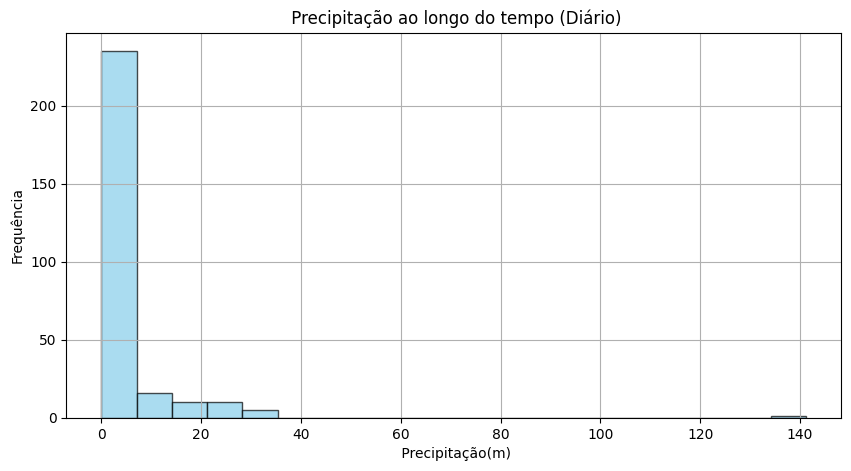

In [23]:
# Histograma

df_diario['rain_mm'].plot(
    kind='hist',
    bins=20,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    grid=True,
    figsize=(10,5),
    title=' Precipitação ao longo do tempo (Diário)',
    xlabel=' Precipitação(m)',
    ylabel='Frequência'
)

<Axes: title={'center': 'Precipitação ao longo do Tempo'}, xlabel='Tempo (mensal)', ylabel='Precipitação (mm)'>

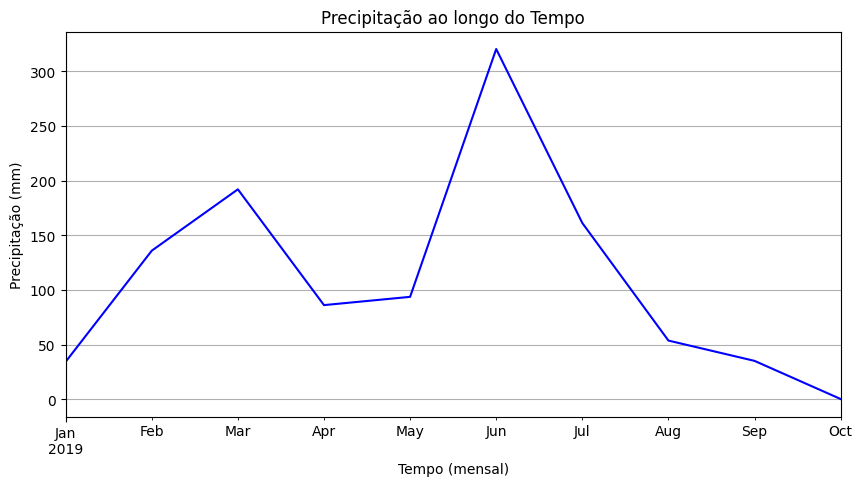

In [25]:
# Dados Mensais

# Gráfico de linha

df_mensal['rain_mm'].plot(
    kind='line',
    title='Precipitação ao longo do Tempo',
    xlabel='Tempo (mensal)',
    ylabel='Precipitação (mm)',
    figsize=(10,5),
    color='blue',
    grid=True
    )

<Axes: title={'center': 'Precipitação (Mensal)'}, ylabel='Precipitação (mm)'>

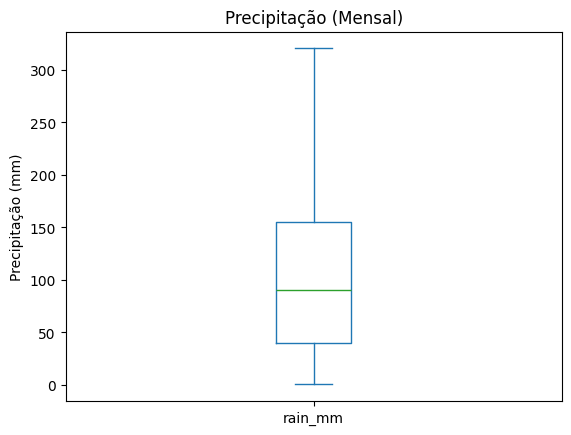

In [29]:
# Boxplot

df_mensal['rain_mm'].plot(kind='box',
                 title='Precipitação (Mensal)',
                 ylabel='Precipitação (mm)'
)

<Axes: title={'center': ' Precipitação ao longo do tempo (Mesal)'}, xlabel=' Precipitação(m)', ylabel='Frequência'>

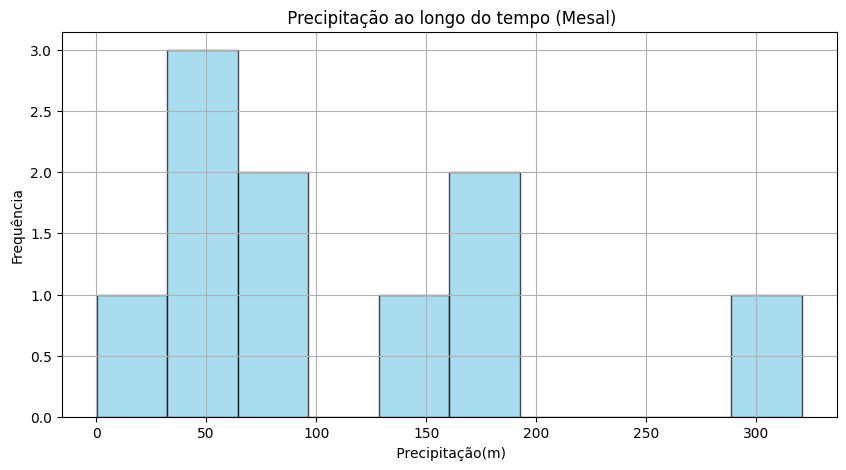

In [28]:
# Histograma

df_mensal['rain_mm'].plot(
    kind='hist',
    bins=10,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    grid=True,
    figsize=(10,5),
    title=' Precipitação ao longo do tempo (Mesal)',
    xlabel=' Precipitação(m)',
    ylabel='Frequência'
)